In [2]:
import numpy as np
from numpy.random import rand
import matplotlib.pyplot as plt

El modelo que estoy planteando es:

Superficie con mínimos de potencial(huecos)donde se produce la adsorción de las moleculas. Esta superficie no presenta modificaciones por la adorsión de las moleculas.


Adsorción de monomeros, esto es que una molecula ocupa un solo lugar. Por ejemplo si fuese dimeros, seria que una molecula ocupa dos lugares.

En este modelo el hamiltoniano

$$
H=\dfrac{1}{2}\sum_{i}^{M} \sum_{j(i)}wc_{i}c_{j}+(U_{o}-\mu)\sum_{i}c_{i}
$$

Donde $M$ es el número de huecos, $w$ es la interacición a primeros vecinos, $c$ vale 1 si el huevo está ocupado y 0 si está desocupado, $U_{o}$ es la energía de interacción con la superficie y $\mu$ el potencial químico.

Ahora suponiendo que no hay interacción a primeros vecinos y $U_{o}$ es cero(no pierde generalidad)

La probabilidad de tener N moleculas adsorbidas en el ensable gran canonico tenemos:

$$
P(N)=\dfrac{e^{  -\dfrac{1}{KbT} \left( -\mu\sum_{i}c_{i} \right) }}{\Xi(\mu,T,M)}
$$

Entonces la probabilidad de adsorcion sin interección a primero vecinos es:

$$
P_{ads}=e^{\left(\dfrac{2\mu}{KbT}\right)}
$$

$$
P_{des}=e^{\left(\dfrac{-2\mu}{KbT}\right)}
$$


modificar el potencial químico es lo mismo que modificar el logaritmo natural de la presión

In [3]:
def termalizar(Terma,Ei,L,mu,T,kb): #hago montecarlo Terma veces para llegar a un seudoequilibrio, esto deberia hacerlo antes de buscar el promedio del recubirmiento para cada potencial 
    for i in range (Terma):
        for j in range (L*L): #montecarlo
            L = Ei.shape[0] 
            M = L*L
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            if Ei[x,y] == 1: #intento desorber
                p = np.random.rand(1)
                Pdes = np.exp(-mu/(kb*T))              
                if p < (Pdes):
                    Ei[x,y]=0
              
 
            else: #intento adsorber
                p = np.random.rand(1)
                Pads = np.exp(mu/(kb*T))
                if p < (Pads):
                    Ei[x,y] = 1
            
 
    Efterma = Ei #Estado luego de termalizar

    return Efterma

In [4]:
def Equilibrio(Equi,Efterma,L,mu,T,kb):
    contador=0 #tiene q volver a cero cuando cambio de potencial
    recuMS=0 #tiene q volver a cero cuando cambio de pontencial
    for i in range (Equi):  
        for j in range (L*L): #montecarlo
            L = Efterma.shape[0] 
            M = L*L 
    
            x = np.random.randint(0,L)
            y = np.random.randint(0,L)
            if Efterma[x,y] == 1: #intento desorber
                p = np.random.uniform(0,1)
                Pdes = np.exp(-mu/(kb*T))              
                if p < (Pdes):
                    Efterma[x,y]=0
                
 
            else: #intento adsorber
                p = np.random.uniform(0,1)
                Pads = np.exp(mu/(kb*T))
                if p < (Pads):
                    Efterma[x,y] = 1
                    
        E_equi=Efterma        
        N = np.count_nonzero(E_equi) #numero de particulas adsorbidas por cada i
        recuM=N/M #cubrimiento en cada vez q hago montecarlo o sea cada i
        
        if recuM != 0: #si es distinto de cero junta el recuM en recuMS y suma un contador
            recuMS =+ recuM
            contador =+ 1
        else: 
            contador = 1 #si no adsorbe nada pongo contador 1 para q no tire error, de todas maneras
                         #recuMS va a ser cero todavía, entonces recuP va a ser cero
    
    
    recuP=recuMS/contador #hago el promedio de todos los recubrimientos por cada montecarlo
    return recuP,E_equi

In [9]:
%%time
L = 20 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 1
Equi = 1500
T=1
kb=1
Ei = np.zeros((L, L)) #estado incila vacío
Potenciales1=[]
Recubrimiento1=[]
potenciales=np.linspace(-5, 10, 31)

for mu in potenciales:
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuP1,E_equi1=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi1
    
    
    Potenciales1.append(mu)
    Recubrimiento1.append(recuP1)
    
    



CPU times: user 3min 54s, sys: 1.09 s, total: 3min 55s
Wall time: 3min 55s


<function matplotlib.pyplot.show>

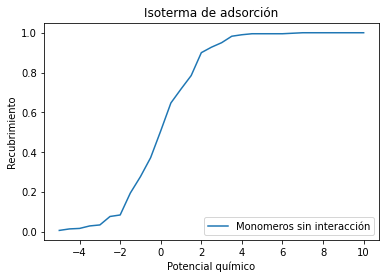

In [6]:
plt.plot(Potenciales1,Recubrimiento1, label='Monomeros sin interacción')
plt.title('Isoterma de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')
plt.legend()
plt.show
 

CPU times: user 38min 50s, sys: 7.43 s, total: 38min 58s
Wall time: 39min 30s


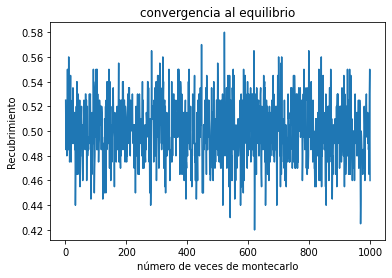

In [5]:
%%time
# voy a ver la convergencia de Equilibrio en Potencial fijo 0
L = 20 #tamaño de la malla LxL
Terma = 1
mu=0
T=1
kb=1
Ei = np.zeros((L, L)) #estado incila vacío
Potenciales=[]
Recubrimiento=[]
NdeM=[] #numero de montecarlos al equilibrio
Efterma=termalizar(Terma,Ei,L,mu,T,kb)

for Equi in range(1,1001,1):
    recuP,E_equi=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Recubrimiento.append(recuP)
    NdeM.append(Equi)

plt.plot(NdeM,Recubrimiento)
plt.title('convergencia al equilibrio')
plt.ylabel('Recubrimiento')
plt.xlabel('número de veces de montecarlo')   
plt.show() 


Hasta acá logré sacar algo parecido a una isoterma. Parecida a la de Langmuir(ponele)

Por otro lado intenté evaluar la convergencia al equilibrio (Ver cuantos pasos de montecarlo son necesarios para que de un valor de recubrimiento constante) pero me dio que le da lo mismo 10 o 1000 pasos. Acá no sé si estoy haciendo algo mal con el código o simplemente al ser tan simple el modelo llega al equilibrio rápido. Entonces ahora es cuando no sé para que lado disparar, estaba pensando en las siguientes cosas:

$\textbf{1-}$ agregar interacción a primeros vecinos y ver que pasa, aunque viendo como va a quedar la probabilidad:
$$
P_{ads}=e^{\left(\dfrac{2\mu-\epsilon_{j}}{KbT}\right)}
$$

$$
P_{des}=e^{\left(\dfrac{-2\mu+\epsilon_{j}}{KbT}\right)}
$$
donde $\epsilon$ es la interacción que puede ser positiva o negativa.
Viendo esto lo que va a suceder es que la curva se achate un poco o se ponga mas vertical según el signo de la interacción.

$\textbf{2-}$ En vez de hacer monomeros, o sea, que cada particula ocupe 1 hueco, puedo hacer de dimeros, o sea, que cada particula ocupe 2 huecos. Esto me da la sensación que le va a costar llegar al equilibrio porque  restringe la configuración de adsorción, aunque no estoy seguro, lo que si estoy seguro es que va a costar mas recursos para los cálculos.

$\textbf{3-}$ Podria intentar de hacer que mas de una particula pueda ocupar un mismo hueco, agregar la interacción con la superficie y decir que la segunda particula que se adosrbe tenga menos interacción con la superficie que la primera, si no me equivoco debería salir una curva mas parecida a una isoterma BET. Esta me interesa un poco más.


In [10]:
%%time
L = 20 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 1
Equi = 1500
T=2
kb=1
Ei = np.zeros((L, L)) #estado incila vacío
Potenciales2=[]
Recubrimiento2=[]
potenciales=np.linspace(-5, 10, 31)

for mu in potenciales:
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuP2,E_equi2=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi2
    
    
    Potenciales2.append(mu)
    Recubrimiento2.append(recuP2)

CPU times: user 3min 54s, sys: 1.15 s, total: 3min 55s
Wall time: 3min 56s


In [11]:
%%time
L = 20 #tamaño de la malla LxL
mui = -5
muf = 10
dmu = 1
Terma = 1
Equi = 1000
T=3
kb=1
Ei = np.zeros((L, L)) #estado incila vacío
Potenciales3=[]
Recubrimiento3=[]
potenciales=np.linspace(-5, 10, 31)

for mu in potenciales:
    Efterma=termalizar(Terma,Ei,L,mu,T,kb)
    recuP3,E_equi3=Equilibrio(Equi,Efterma,L,mu,T,kb)
    Ei=E_equi3
    
    
    Potenciales3.append(mu)
    Recubrimiento3.append(recuP3)

CPU times: user 2min 38s, sys: 762 ms, total: 2min 39s
Wall time: 2min 39s


<function matplotlib.pyplot.show>

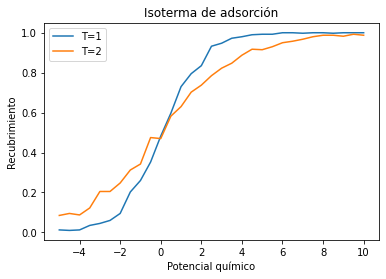

In [11]:
plt.plot(Potenciales1,Recubrimiento1, label='T=1', )
plt.plot(Potenciales2,Recubrimiento2, label='T=2')
#plt.plot(Potenciales3,Recubrimiento3, label='T=3')
plt.title('Isoterma de adsorción')
plt.ylabel('Recubrimiento')
plt.xlabel('Potencial químico')
plt.legend()
plt.show